### Loading the necessarry Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Real World Examples

#### Line Graph

0     1990
3     1993
6     1996
9     1999
12    2002
15    2005
18    2008
Name: Year, dtype: int64


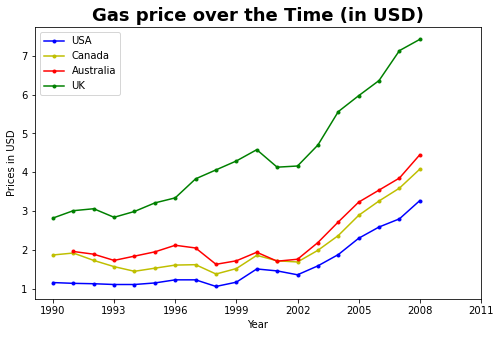

In [29]:
#Reading the data from the CSV file:
url = 'https://raw.githubusercontent.com/chiragrathi24/Matplotlib_Tutorial/main/gas_prices.csv' 
gas = pd.read_csv(url)

#Defining the size of the graph:
plt.figure(figsize = (8,5))

#Giving the title of the graph:
plt.title('Gas price over the Time (in USD)', fontdict={'fontweight': 'bold', 'fontsize' : 18})

#Plotting the selected countries in the graph:
plt.plot(gas.Year, gas.USA,'b.-', label = 'USA')
plt.plot(gas.Year, gas.Canada, 'y.-', label = 'Canada')
plt.plot(gas.Year, gas.Australia, 'r.-', label = 'Australia')
plt.plot(gas.Year, gas.UK, 'g.-', label = 'UK')

#Another way to plot many values from the CSV file:
# countries_we_want_to_plot = ['USA', 'Canada', 'Australia', 'UK']
# for country in gas:
#     if country in countries_we_want_to_plot:
#         plt.plot(gas.Year, gas[country], marker = '.')

#Plotting all the countries in the CSV file:
# for country in gas:
#     if country != 'Year':
#         plt.plot(gas.Year, gas[country], marker = '.')

#Displaying the years in the intervals of three:
print(gas.Year[::3])

#Defining the intervals of the ticks:
plt.xticks(gas.Year[::3].tolist() + [2011])

#Labelling the axes:
plt.xlabel('Year')
plt.ylabel('Prices in USD')

#Displaying the legend:
plt.legend()

#Saving the graph in the image format:
plt.savefig('Gas_price_figure.png', dpi = 300)

#Displaying the graph:
plt.show()

### Loading the Fifa Data Set

In [32]:
url = 'https://raw.githubusercontent.com/chiragrathi24/Matplotlib_Tutorial/main/fifa_data.csv'
fifa = pd.read_csv(url)
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


#### Histograms

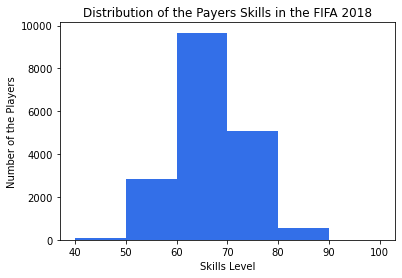

In [38]:
#Defining the bins for the axes:
bins = [40,50,60,70,80,90,100]

#Plotting the Histogram and defining its properties:
plt.hist(fifa.Overall, bins = bins, color = '#336fe8')

#Defining the ticks for the X-Axis:
plt.xticks(bins)

#Giving the title for the graph and labelling the axes:
plt.title('Distribution of the Payers Skills in the FIFA 2018')
plt.xlabel('Skills Level')
plt.ylabel('Number of the Players')

#Displaying the Histogram:
plt.show()

### Pie Charts

Left Foot:  4211
Right Foot : 13948


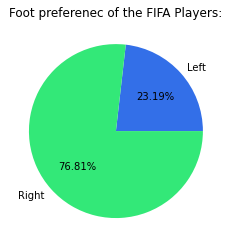

In [54]:
#Finding the number of players who use their left foot or the right foot for the shooting:
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]
print('Left Foot: ',left)
print('Right Foot :', right)

#Labelling and assigning the colours to the sectors:
labels = ['Left', 'Right']
colors = ['#336fe8', '#33e878']

#Plotting the Pie chart:
plt.pie([left,right], labels = labels, colors = colors, autopct = '%.2f%%')

#Giving the title to the chart and then displaying it:
plt.title('Foot preferenec of the FIFA Players:')
plt.show()

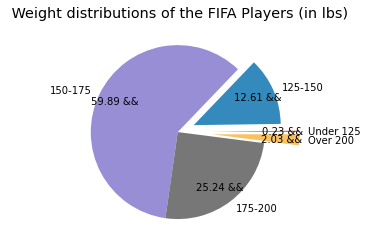

In [71]:
#Plotting a more advanced Pie chart:
#Finding the weight of the players and then changing them from the string values to the integer values:
fifa.Weight = [int(x.strip('lbs')) if type(x) == str else x for x in fifa.Weight]

#Defining the style of the Pie chart:
plt.style.use('ggplot')

#Classifying the weights of the players into the different categories:
light =  fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0]
medium = fifa[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy = fifa[(fifa.Weight >= 175) & (fifa.Weight < 200)].count()[0]
heavy = fifa[(fifa.Weight >= 200)].count()[0]

#Storing the weights categories into the list, labelling the different sectors and then seprating the closely plotted sectors:
weights = [light, light_medium, medium, medium_heavy, heavy]
labels = ['Under 125', '125-150', '150-175', '175-200', 'Over 200']
explode = (.4,.2,0,0,.4)

#Giving the title to the Pie chart:
plt.title(" Weight distributions of the FIFA Players (in lbs)")

#Plotting the Pie chart and then displaying it:
plt.pie(weights, labels = labels, autopct = '%.2f &&', pctdistance = 0.8, explode = explode)
plt.show()

### Box and Whisker plot:

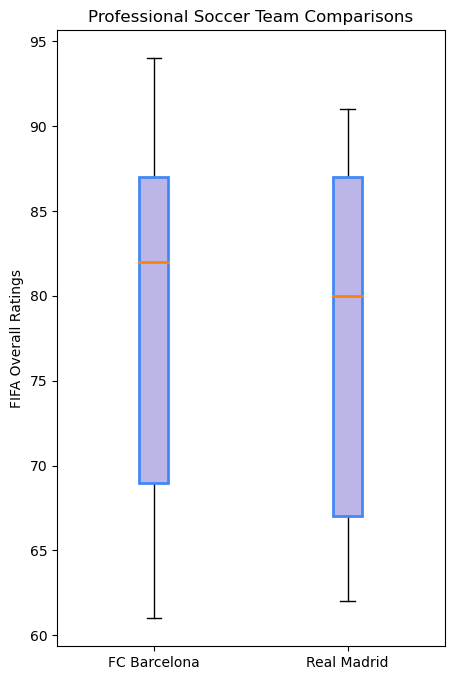

In [85]:
#Selecting the style of the plot:
plt.style.use('default')

#Defining the size of the Whisker plot:
plt.figure(figsize = (5,8))

#Finding the overall score of the FC Barcelona and Real Madrid:
barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
madrid = fifa.loc[fifa.Club == 'Real Madrid']['Overall']

#Labelling the names of the teams:
labels = ['FC Barcelona', 'Real Madrid']

#Plotting the Box and the Whisker plot:
boxes = plt.boxplot([barcelona, madrid], labels = labels, patch_artist = True, medianprops = {'linewidth':2})
#Changing the colours:
for box in boxes['boxes']:
    #Set the edge colour:
    box.set(color = '#4287f5', linewidth = 2)
    #For changing the fill colours:
    box.set(facecolor = '#bcb5e8')

#Giving the title:
plt.title('Professional Soccer Team Comparisons')

#Labelling the Y-axis:
plt.ylabel('FIFA Overall Ratings')

#Displaying the plot:
plt.show()